<a href="https://colab.research.google.com/github/rkaur050/Spine-Condition-Analysis/blob/main/Spine_Condition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data=pd.read_csv('/Dataset_spine.csv')

In [7]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Data Processing


In [8]:
# Unnecessary column
data.iloc[:,-1:].head()

,Unnamed: 13
0,NaN
1,NaN
2,Prediction is done by using binary classificat...
3,NaN
4,NaN


In [9]:
del data["Unnamed: 13"]

In [10]:
# Mapping column name
data.rename(columns = {
    "Col1" : "pelvic_incidence",
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope",
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis",
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope",
    "Col10" :"cervical_tilt",
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope",
    "Class_att" : "class"}, inplace=True)

In [11]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [12]:
#Data Overview
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB
N

In [13]:
#Summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean      117.920655                 26.296694      0.472979    21.321526   
std        13.317377                 37.559027      0.

In [14]:
# Checking for Missing Values
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64


EDA

In [15]:
data["class"].value_counts()

,count
class,
Abnormal,210
Normal,100


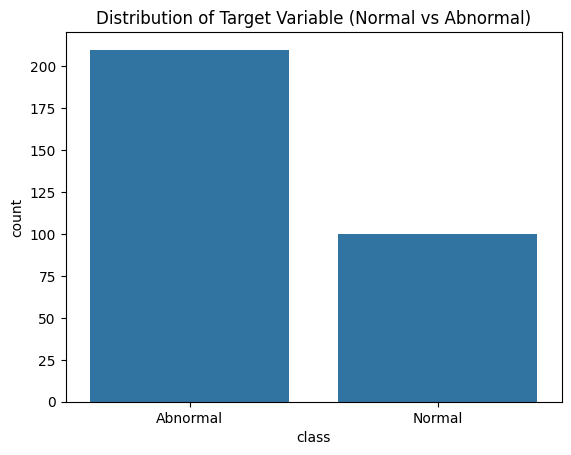

In [16]:
# 5. Visualize Distribution of Target Variable
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable (Normal vs Abnormal)')
plt.show()

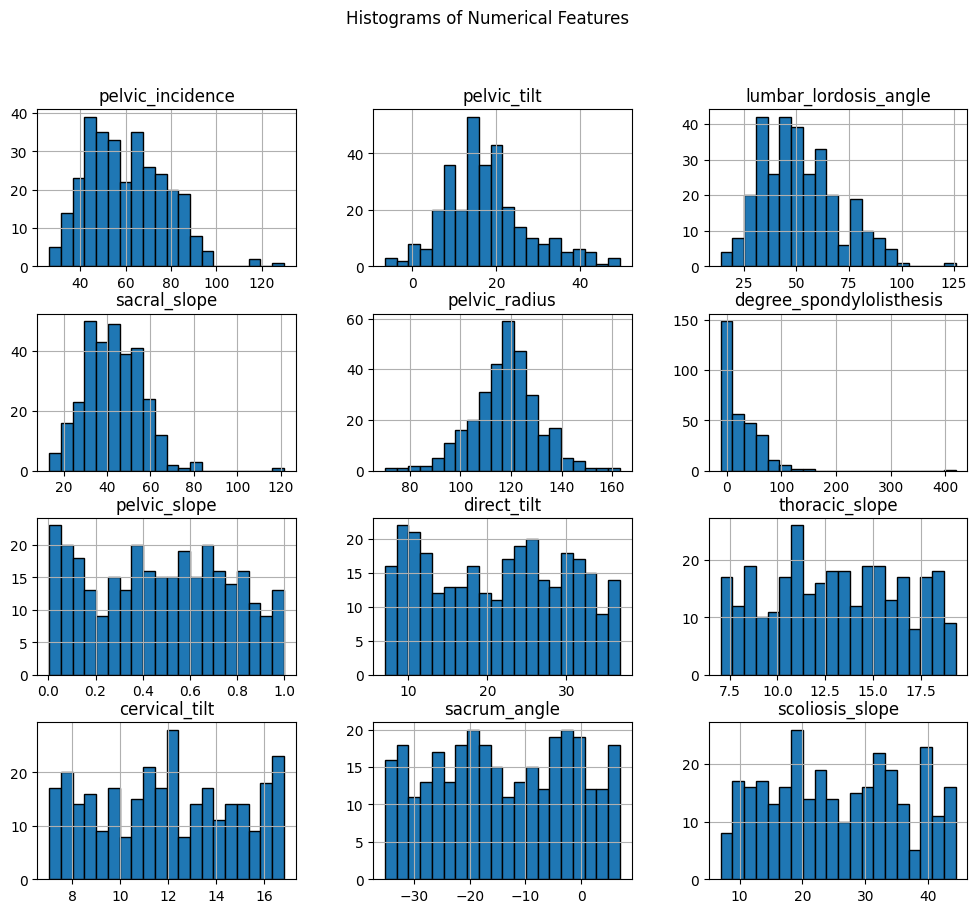

In [17]:
# Visualizing Numerical Features with Histograms
numerical_features = data.select_dtypes(include=['float64']).columns
data[numerical_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [18]:
# Correlation Matrix for Numerical Features
numerical_data = data.select_dtypes(include=['float64'])

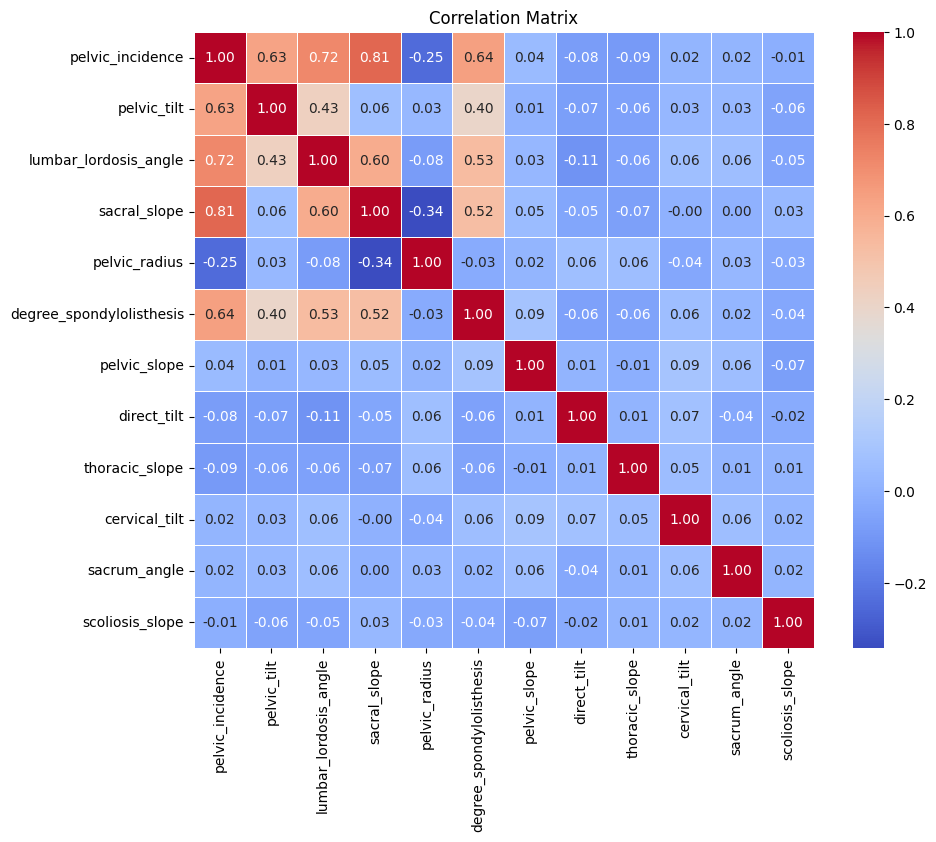

In [19]:
# Creating the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

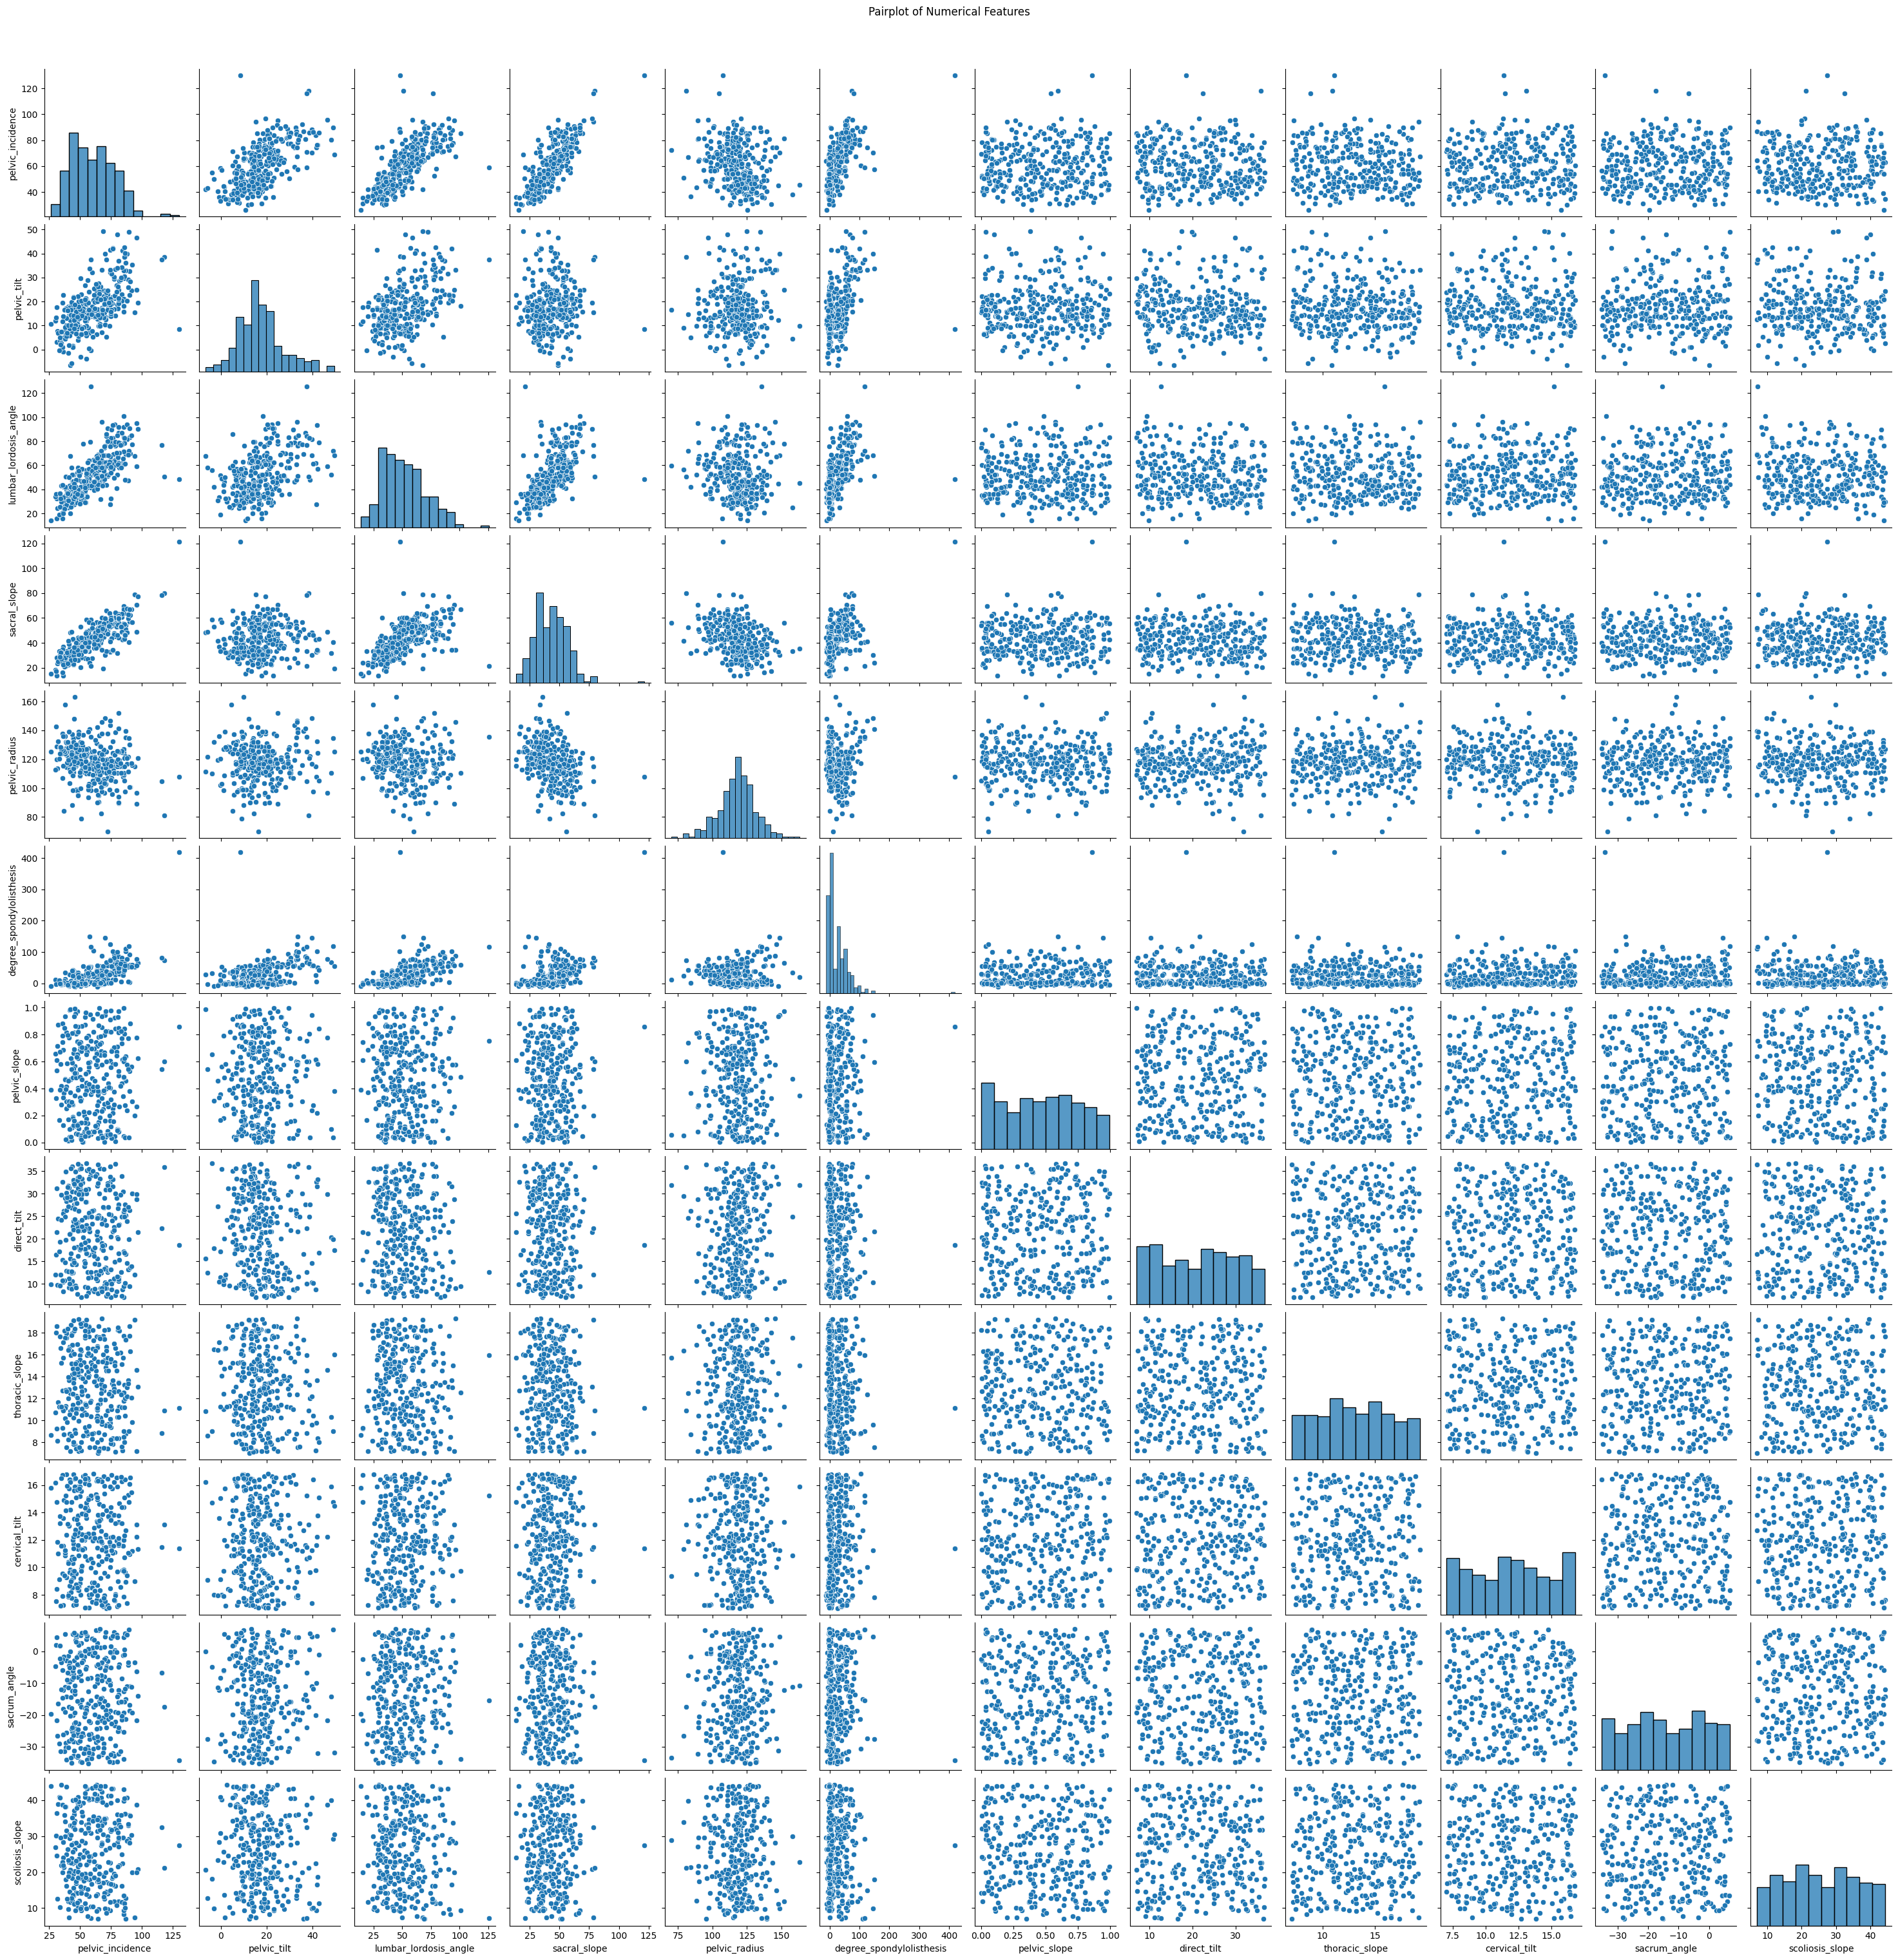

In [20]:
# Pairplotting to Visualize Relationships Between Features
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Splitting into Training and Testing Dataset

In [21]:
# Separate features (X) and target variable (y)
X = data.drop(columns='class')
y = data['class']

In [22]:

# Split the data into training and testing sets (80-20 split)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
# Checking the first few rows of standardized data
print("First 5 rows of standardized X_train:")
print(X_train[:5])

First 5 rows of standardized X_train:
[[ 0.63294865  0.50768964  0.44692756  0.4488586  -1.18307392  0.06411647
  -1.52665039 -0.60489919  0.51755424 -0.1283303  -0.36526903 -0.57236701]
 [ 0.51156455 -0.18942352  0.66256327  0.79334738  0.43550848  0.37020317
  -0.77605754  0.68843893  1.35307911 -1.57308802 -0.56082856 -0.83428849]
 [-0.59323076 -0.01528651 -1.30700744 -0.75132401  0.27734871 -0.61408236
   0.07758004  1.07267828  0.72025001  1.36980061 -1.16142209 -0.36099195]
 [-1.30464185 -0.78903278 -0.51950982 -1.11000088  1.41110088 -0.3058508
  -0.00354437  0.90675232 -0.84228053 -0.19939099 -0.42093966  0.7873547 ]
 [ 0.96448544  2.63721882  2.365255   -0.65393538  1.13580229  1.98657685
  -0.88491492  1.19888695  0.16664139  0.13154445  1.53285706 -0.89106679]]


Training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
models={
    "LogisticRegression         ":LogisticRegression(),
    "SupportVectorClassifier    ":SVC(),
    "DecisionTreeClassifier     ":DecisionTreeClassifier(),
    "RandomForestClassifier     ":RandomForestClassifier(),
}

for name,model in models.items():
        model.fit(X_train,y_train)
        print(name + " " + "Trained")

LogisticRegression          Trained
SupportVectorClassifier     Trained
DecisionTreeClassifier      Trained
RandomForestClassifier      Trained


In [27]:
for name, model in models.items():
    y_pred = model.predict(X_test)                       # Predicting on test data
    accuracy = accuracy_score(y_test, y_pred) * 100      # Calculating accuracy
    print(f"{name.strip()} Accuracy: {accuracy:.4f}")

LogisticRegression Accuracy: 85.4839
SupportVectorClassifier Accuracy: 82.2581
DecisionTreeClassifier Accuracy: 82.2581
RandomForestClassifier Accuracy: 79.0323


In [30]:
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predicting on test data
    print(f"Predictions by {name.strip()}:")
    print(y_pred[:10])  # Show the first 10 predictions
    print("Actual values (First 10):")
    print(y_test[:10].values)  # Show the first 10 actual values
    print("\n")

Predictions by LogisticRegression:
['Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal']
Actual values (First 10):
['Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal']


Predictions by SupportVectorClassifier:
['Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal']
Actual values (First 10):
['Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal']


Predictions by DecisionTreeClassifier:
['Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal']
Actual values (First 10):
['Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal']


Predictions by RandomForestClassifier:
['Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal']
Ac